# RATINGS PREDICTION


# Problem statement:


The rise in E-commerce, has brought a significant rise in the importance of customer reviews. There are hundreds of review sites online and massive amounts of reviews for every product. Customers have changed their way of shopping and according to a recent survey, 70 percent of customers say that they use rating filters to filter out low rated items in their searches. The ability to successfully decide whether a review will be helpful to other customers and thus give the product more exposure is vital to companies that support these reviews, companies like Google, Amazon, flipkart and Yelp!. In the present system, the e-commerce platform will send a feedback mail to customers after the product is delivered. The customers can give ratings out of 5, also can write down some comments/reviews about the product that he/she has purchased. Using these reviews and ratings, e-commerce platform will rate the products, which helps other people to get the insights about the quality of the product. But many times, customers would not give any ratings or reviews. How to predict the review score that a customer could give? This is the problem in e-commerce business.

There are two main methods to approach this problem. The first one is based on review text content analysis and uses the principles of natural language process (the NLP method). This method lacks the insights that can be drawn from the relationship between costumers and items. The second one is based on recommender systems, specifically on collaborative filtering, and focuses on the reviewer’s point of view. Use of the user’s similarity matrix and applying neighbors analysis are all part of this method. This method ignores any information from the review text content analysis.

Business Goal:


We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.



Data Collection Phase:


I have done web scraping to collect the data of customers review ratings from the well known websites https://www.flipkart.com/ and https://www.amazon.com/. In this section I have scraped the reviews of different laptops, Phones, Headphones, smart watches, Professional Cameras, Printers, Monitors, Home theatre, Router from the above 2 mentioned e-commerce websites.



Model Building Phase:


After collecting the data, we need to build a machine learning model. Before model building should do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model.



# Importing necessary libraries/dependencies


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
# Importing nltk libraries
import nltk
import re
import string
from nltk import FreqDist
from nltk.corpus import wordnet
from scipy.sparse import hstack
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Evaluation metrics
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
# Defifning different algorithms
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file
df = pd.read_csv("Review_Rating.csv")
df

,Review_title,Reiew_text,Ratings
0,Display is pathetic,The laptop is good but display is pathetic. It...,2.0 out of 5 stars
1,Not for google lovers!,Microsoft surface doesn’t permit using google ...,3.0 out of 5 stars
2,Its A Scam!,"It's a scam, the mouse is not part of the purc...",1.0 out of 5 stars
3,I never got the mouse that was promised with t...,I never got the mouse promised with this .,1.0 out of 5 stars
4,"Worst Buy !! PLEASE DON""T BUY THIS",DOn't Like this at all pretty un convenient. B...,1.0 out of 5 stars
...,...,...,...
28339,Mind-blowing purchase,Well experienced. But there should be a carryb...,5
28340,Worth every penny,Very good product flipkart is lovely app,5
28341,Highly recommended,Very good I loved it in the price range,5
28342,Worth every penny,Too good,5


Here I am importing the colleced dataset which is in comma separated values (csv) format and storing it into dataframe (df) for further usage. Here we can observe first 5 and last 5 rows of the dataset. There are 28344 rows and 3 columns in the dataframe. The dataset contains textual data and contains both dependent and independent variables. We have our target variable "Ratings" which stores the ratings of the customers reviews and it is textual in nature which has multiclasses that makes this problem to be a "Classification Problem".

Data description
1. Review_title : Title of the review
2. Review_text : Content of the review text
3. Ratings : Ratings out of 5 stars

# Exploratory Data Analysis (EDA)


In [3]:
# Checking the dimensions of the dataset
print("There are {} rows and {} columns in dataframe".format(df.shape[0],df.shape[1]))


There are 28344 rows and 3 columns in dataframe


In [4]:
# Checking the column names present in the dataset
print("Columns present in dataset:\n",df.columns)

Columns present in dataset:
 Index(['Review_title', 'Reiew_text', 'Ratings'], dtype='object')


In [5]:
# To get the good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28344 entries, 0 to 28343
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_title  23385 non-null  object
 1   Reiew_text    23463 non-null  object
 2   Ratings       23390 non-null  object
dtypes: object(3)
memory usage: 664.4+ KB


By checking the above observations we can say the dataset contains 3 columns viz. Review_title, Review_title, Ratings. We can notice all the columns are object data type. Out of 3 columns 2 are indepednent variables and remaining one is our target variable that is "Ratings" which is depednent variable.

# Checking null values


In [6]:
# Displaying the columns containing null values count and their % i.e. ((count of null)/77551)/100

null = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum())
null.columns=['Count of Null Values']
null['% of Null Values']=null['Count of Null Values']/283.44     # 28344/100 = 283.44
null

,Count of Null Values,% of Null Values
Review_title,4959,17.495766
Reiew_text,4881,17.220576
Ratings,4954,17.478126


From the above observation we can notice there are missing values present in all the 3 columns also we can observe the percentage of the missing values in each column. We will use imputation methods to fill up these missing values.

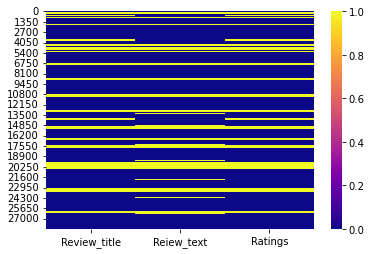

In [7]:
# Let's visualize the null values clearly in dataset using heat map
sns.heatmap(df.isnull(), cmap="plasma")
plt.show()

From the above heat map we can notice the white line which shows the missing values in the dataset.



# Treating null values using imputation techniques


Instead of removing the rows having NAN values we can fill them using imputation methods like mean, mode and median. Since all the 3 columns are having categorical data, let's fill the null values using mode values.



In [8]:
# let's check the mode of the columns
print("mode of Review_title is:", df["Review_title"].mode())  # we will fill the null values using its mode
print("mode of Review_text is:", df["Reiew_text"].mode())
print("mode of Ratings is:", df["Ratings"].mode())

mode of Review_title is: 0    Good
Name: Review_title, dtype: object
mode of Review_text is: 0    Good
Name: Reiew_text, dtype: object
mode of Ratings is: 0    5.0 out of 5 stars
Name: Ratings, dtype: object


In [9]:
# Filling null values of object data column with their mode values (most frequently occurred values).

col1=df.columns.values
for i in range(0,len(col1)):
    if df[col1[i]].dtype == "object":
        df[col1[i]].fillna(df[col1[i]].mode()[0], inplace=True)

In [10]:
# Lets check the null values again
df.isnull().sum()

Review_title    0
Reiew_text      0
Ratings         0
dtype: int64

We are successfully filled the null values using mode method and there are no any missing values in the dataset.



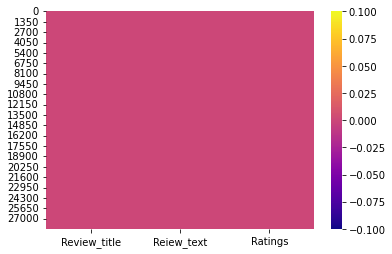

In [11]:
# Let's visualize the null values clearly in dataset using heat map
sns.heatmap(df.isnull(), cmap="plasma")
plt.show()

From the heat map we can clearly see that there are no missing values in the dataset.



In [12]:
# Checking number of unique values in each column of dataset
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
Review_title,12653
Reiew_text,16612
Ratings,10


# Value Count Function


In [13]:
# Check value counts for each feature

cols=['Review_title', 'Reiew_text', 'Ratings']
for col in cols:
    print("Value Counts of {} :".format(col, df[col].nunique()))
    print(df[f'{col}'].value_counts())
    print('*'*100)

Value Counts of Review_title :
Good                                                   5694
Good product                                            235
Nice                                                    234
Value for money                                         161
Nice product                                            141
                                                       ... 
Best in Price segment                                     1
Real Beast                                                1
Very classy                                               1
Best Amazone Product with amazing delivery on time.       1
Superb e-sports gaming laptop                             1
Name: Review_title, Length: 12653, dtype: int64
****************************************************************************************************
Value Counts of Reiew_text :
Good                                                                                                                               

These are the value counts of the columns present in the dataset.

From the values count function we can notice that the target variable "Ratings" containing some duplicate string values like "star" which we need to replace them.

In [14]:
# Let's look at the unique values in the target column
df['Ratings'].unique()

array(['2.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '5.0 out of 5 stars', '4.0 out of 5 stars', '5', '4', '2', '1',
       '3'], dtype=object)

In [15]:
# Replacing duplicated values in the label and converting the data to integer datatype
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].replace('5.0',5)
df['Ratings'] = df['Ratings'].replace('4.0',4)
df['Ratings'] = df['Ratings'].replace('3.0',3)
df['Ratings'] = df['Ratings'].replace('2.0',2)
df['Ratings'] = df['Ratings'].replace('1.0',1)
df['Ratings'] = df['Ratings'].astype('int')

In [16]:
# Checking value counts after replacing the values
df.Ratings.value_counts()

5    11006
4     4791
1     4586
3     4103
2     3858
Name: Ratings, dtype: int64

In [17]:
# Unique values after replacing the values
df.Ratings.unique()

array([2, 3, 1, 5, 4])

I have replaced all the duplicate categories present in the target column and converted the data into integer data type. Now let's combine both reviews title and text into one column as "Reviews".



In [18]:
# Combining Review text and Review_title into one
df['Review'] = df['Review_title'].map(str)+' '+df['Reiew_text']

In [19]:
# Displaying the dataset again
df

,Review_title,Reiew_text,Ratings,Review
0,Display is pathetic,The laptop is good but display is pathetic. It...,2,Display is pathetic The laptop is good but dis...
1,Not for google lovers!,Microsoft surface doesn’t permit using google ...,3,Not for google lovers! Microsoft surface doesn...
2,Its A Scam!,"It's a scam, the mouse is not part of the purc...",1,"Its A Scam! It's a scam, the mouse is not part..."
3,I never got the mouse that was promised with t...,I never got the mouse promised with this .,1,I never got the mouse that was promised with t...
4,"Worst Buy !! PLEASE DON""T BUY THIS",DOn't Like this at all pretty un convenient. B...,1,"Worst Buy !! PLEASE DON""T BUY THIS DOn't Like ..."
...,...,...,...,...
28339,Mind-blowing purchase,Well experienced. But there should be a carryb...,5,Mind-blowing purchase Well experienced. But th...
28340,Worth every penny,Very good product flipkart is lovely app,5,Worth every penny Very good product flipkart i...
28341,Highly recommended,Very good I loved it in the price range,5,Highly recommended Very good I loved it in the...
28342,Worth every penny,Too good,5,Worth every penny Too good


In [20]:
# Let's have a look at value count function of Review
df.Review.value_counts()

Good Good                                                                                                                                                                                                                                                                             4533
Ok Ok                                                                                                                                                                                                                                                                                   56
Nice Nice                                                                                                                                                                                                                                                                               51
Good product Good product                                                                                                                              

In [21]:
# Dropping Review_title and Review_text column as we have got new Review column 
df.drop(columns=["Review_title","Reiew_text"],axis=1,inplace=True)

# Text Preprocessing


Using the text preprocessing techniques we can remove noise from raw data and makes raw data more valuable for building models. Pre-processing involves the following steps, but these will be performed in a slightly different manner:

1. Text case conversion
2. Removing Punctuations and other special characters
3. Splitting the comments into individual words
4. Removing Stop Words
5. Stemming and Lemmatization
6. Text Standardization-Normalization
7. Splitting dataset into Training and Testing

In [22]:
# Creating new column for length of Reviews
df['original_length']=df.Review.str.len()
df

,Ratings,Review,original_length
0,2,Display is pathetic The laptop is good but dis...,283
1,3,Not for google lovers! Microsoft surface doesn...,525
2,1,"Its A Scam! It's a scam, the mouse is not part...",108
3,1,I never got the mouse that was promised with t...,94
4,1,"Worst Buy !! PLEASE DON""T BUY THIS DOn't Like ...",193
...,...,...,...
28339,5,Mind-blowing purchase Well experienced. But th...,87
28340,5,Worth every penny Very good product flipkart i...,58
28341,5,Highly recommended Very good I loved it in the...,58
28342,5,Worth every penny Too good,26


I have created new column "original_length" which contains the length of the Review text.

The string library contains punctuation characters. This is imported and all numbers are appended to this string. From the value count functions we have seen that our Review feature contains strings such as won't, didn't, etc which contain apostrophe character('). To prevent these words from being converted to wont/didnt, the character ' represented as ' in escape sequence notation is replaced by empty character in the punctuation string.

In [23]:
# Defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text 
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) # Removing urls
    return text

In [24]:
# Removing punctuations
df['Review'] = df['Review'].str.replace(r'[^\w\d\s]', ' ')

Converting all our text into the lower case is a simple and most effective approach. If we are not applying lower case conversion on words like NLP, nlp, Nlp, we are treating all these words as different words/tokens. It is better to perform lower case the text as the first step in this text preprocessing. Because if we are trying to remove stop words all words need to be in lower case.

In [25]:
# Convert all comment texts to lower case in dataset
df['Review'] = df['Review'].apply(lambda x : x.lower())

df['Review'] = df['Review'].apply(lambda x : decontracted(x))

In [26]:

# Replacing '\n' in Review
df['Review'] = df['Review'].replace('\n',' ')

# Removing Stopwords


Stopwords are common words and irrelevant words from which we can't get any useful information for our model or problem statement.

Few stopwords are "a", "an", "the", etc. Single letter words if existing or created due to any preprocessing step do not convey any useful meaning and hence can be directly removed. Hence letters from b to z, will be added to the list of stop words imported directly.

In [27]:
# Remove stopwords
stop_words = set(stopwords.words('english') + ['u','ü','ur','4','2','im','dont','doin','ure'])

df["Review"] = df["Review"].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

# Stemming and Lemmatization


Stemming is the process of converting inflected/derived words to their word stem or the root form. Basically, a large number of similar origin words are converted to the same word.E.g. words like "stems", "stemmer", "stemming", "stemmed" as based on "stem". This helps in achieving the training process with a better accuracy.
Lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item. This is quite similar to stemming in its working but differs since it depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, such as neighboring sentences or even an entire document.

In [28]:
# Defining function to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [32]:
lemmatizer = nltk.stem.WordNetLemmatizer()


# Text Normalization-Standardization


Let's remove all the noise data which is present in the text



In [33]:
# Removing noise data from the text
def noise_words(text):
    # Remove html markup
    text = re.sub("(<.*?>)", "", text)
    # Remove non-ASCII and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # Remove white space
    text = text.strip()
    return text

In [34]:
df['Review'] = df['Review'].apply(lambda x : noise_words(x))


I have defined a function noise_words for removing the noise from the text. It will remove any html markups, digits,urls and white spaces from the text. Let's have a look at first two rows of the text from review column to understand it.

In [35]:
df['Review'][0]


'display pathetic laptop good display pathetic strains eyes worked mac book awful work price selling worth hard requirement windows laptop purchase avoid possible'

In [36]:
df['Review'][1]


'google lovers microsoft surface permit using google apps chrome youtube gmail etc straightaway pay much still machine controlled someone else really frustrating buy really want full google apps experience br month two able download use google chrome browser straightaway good microsoft wireless mouse also good handy though use less  ways command e track pad touch mouse'

As we can observe all the text has been converted to lower case and removed irrelevant words, punctuations, stop words etc.



# Count of words in the text


Now, I am creating a column which contains count of words in the text.



In [37]:
# Creating column for word counts in the text
df['Review_word_count'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Review_word_count','Review']].head()


,Review_word_count,Review
0,23,display pathetic laptop good display pathetic ...
1,57,google lovers microsoft surface permit using g...
2,9,scam scam mouse part purchase wrong descriptio...
3,8,never got mouse promised never got mouse promised
4,24,worst buy please buy like pretty un convenient...


In [38]:
# New column (clean_length) after removing punctuations, stopwords in dataset
df['clean_length'] =df.Review.str.len()
df

,Ratings,Review,original_length,Review_word_count,clean_length
0,2,display pathetic laptop good display pathetic ...,283,23,161
1,3,google lovers microsoft surface permit using g...,525,57,370
2,1,scam scam mouse part purchase wrong descriptio...,108,9,62
3,1,never got mouse promised never got mouse promised,94,8,49
4,1,worst buy please buy like pretty un convenient...,193,24,136
...,...,...,...,...,...
28339,5,mind blowing purchase well experienced carryba...,87,8,60
28340,5,worth every penny good product flipkart lovely...,58,8,50
28341,5,highly recommended good loved price range,58,6,41
28342,5,worth every penny good,26,4,22


I have created new column "clean_length" in dataset after cleaning the data. We can see that nearly half of the text has been removed from the Review after using required pre-processing.

In [39]:
# Total length removal in data
print('Original Length:',df.original_length.sum())
print('Clean Length:',df.clean_length.sum())
print("Total Words Removed:", (df.original_length.sum()) - (df.clean_length.sum()))

Original Length: 4871657
Clean Length: 3329805
Total Words Removed: 1541852


In [40]:
# Statistical summary of dataset
df.describe()

,Ratings,original_length,Review_word_count,clean_length
count,28344.000000,28344.000000,28344.000000,28344.000000
mean,3.485923,171.876129,19.165785,117.478302
std,1.506485,316.290865,34.643731,208.762267
min,1.000000,3.000000,1.000000,0.000000
25%,2.000000,27.000000,4.000000,22.000000
50%,4.000000,87.000000,10.000000,62.000000
75%,5.000000,198.000000,22.000000,135.250000
max,5.000000,20046.000000,1937.000000,12362.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

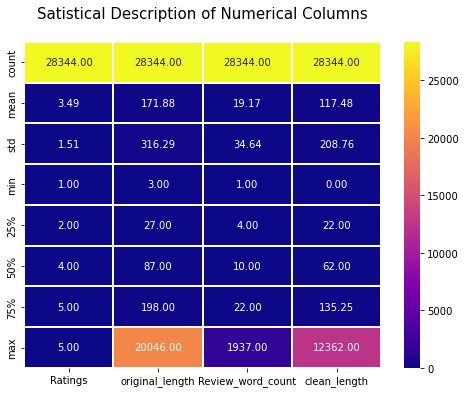

In [41]:
# Visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (8,6))
sns.heatmap(round(df.describe()[0:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="plasma")
plt.title("Satistical Description of Numerical Columns\n",fontsize=15)

plt.show()

From the heat map we can observe the statistical summary of the numerical features present in the dataset.



# Visualizations


Target Variable "Ratings"


5    11006
4     4791
1     4586
3     4103
2     3858
Name: Ratings, dtype: int64


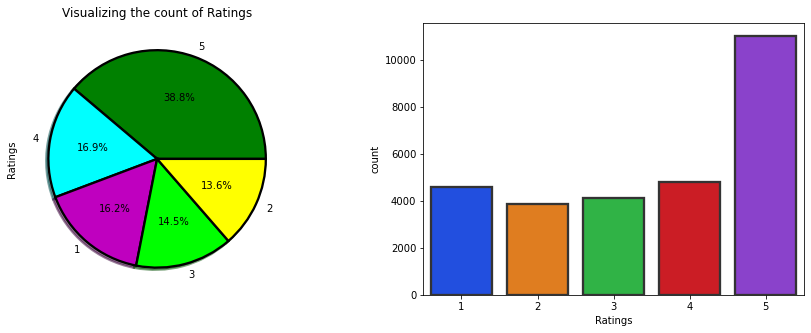

In [42]:
# Visualizing the target variable
print(df['Ratings'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['5', '4', '1', '3', '2']
colors = ["green", "cyan", "m", "lime", "yellow"]
df['Ratings'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,colors=colors,
                                              wedgeprops = {'linewidth':2.3, 'edgecolor':'k'},
                                              title = 'Visualizing the count of Ratings')
ax = sns.countplot('Ratings', data=df, ax=ax[1],palette="bright",linewidth=2.3, edgecolor=".2")
plt.show()

Looking at the above pie chart and count plot for our target variable "Ratings" we can say that the dataset contains the more review text rated as 5 star compared to other review ratings and very less reviews rated as 2 compared to others. Around 44% of the texts are rated as 5 and only 10% of the texts rated as 2 stars.

So, we can say that there is "imbalance problem" which we need to make it balance to build our model.

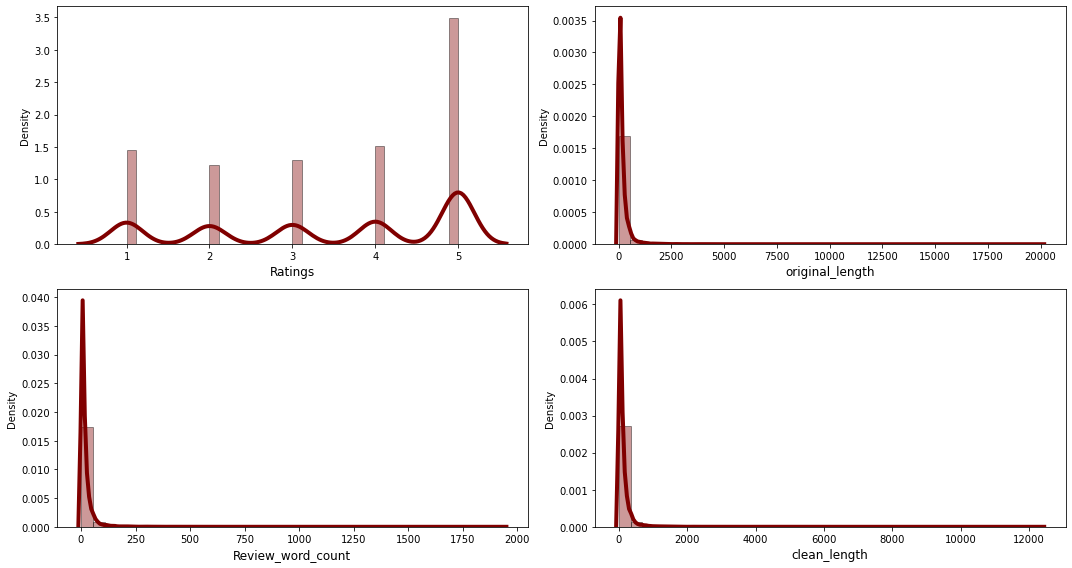

In [43]:
# Checking how the data has been distriubted in each column using histogram and density plots
col = ["Ratings","original_length","Review_word_count","clean_length"]
plt.figure(figsize=(15,8),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column],color="maroon",hist=True, kde = True,bins = int(180/5),hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

From the dist plot we can notice that data in all the columns are skewed to right except the target column. Which means the mean value is greater than the median in these columns.

From the histogram of Review_word_count we can clearly observe that most of our text is having the number of words in the range of 0 to 200, and some of the text are too lengthy which are out of range which acts as outliers in our data.

Also, the plot of clean_length also quite similar to the histogram of Review_word_count.

Since there is skewness in the data we need to remove it before building the machine learning models.

# Checking for skewness in dataset


In [44]:
# Checking the skewness
df.skew()

Ratings              -0.461616
original_length      14.175449
Review_word_count    12.324256
clean_length         12.908771
dtype: float64

Here we can observe the skewness present in all the columns. But Ratings column is our target and it has categorical data so no need to remove skewness in this column. Let's remove skewness in the remaining columns using yeo-johnson method.



# Removing skewness using yeo-johnson method


In [45]:
# Removing skewness using yeo-johnson  method to get better prediction
features= ['original_length', 'Review_word_count', 'clean_length']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [46]:
df[features] = scaler.fit_transform(df[features].values)
df[features]

,original_length,Review_word_count,clean_length
0,0.988391,0.812205,0.858315
1,1.461757,1.502892,1.517050
2,0.261065,-0.009231,0.089366
3,0.157464,-0.118464,-0.101789
4,0.697744,0.847007,0.723269
...,...,...,...
28339,0.099870,-0.118464,0.062754
28340,-0.199953,-0.118464,-0.085363
28341,-0.199953,-0.388802,-0.246786
28342,-0.781279,-0.773393,-0.752830


In [47]:
# Checking skewness after using yeo-johnson method
df[features].skew()

original_length     -0.004599
Review_word_count    0.063784
clean_length         0.007191
dtype: float64

We can notice there is no skewness in the data after using yeo-johnson method. Let's visualize the distribution of data after removing outliers and skewness.



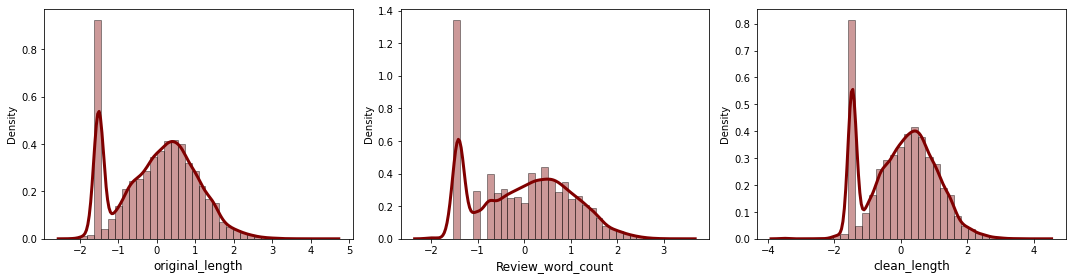

In [48]:
# Checking how the data has been distriubted in each column 
col = ["original_length","Review_word_count","clean_length"]
plt.figure(figsize=(15,4),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=3:
        ax=plt.subplot(1,3,plotnumber)
        sns.distplot(df[column],color="maroon",hist=True, kde = True,bins = int(180/5),hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':3})
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

The data looks almost normal after removing the skewness compared to the previous data.



# Plotting WordCloud


# Words for rating = 1


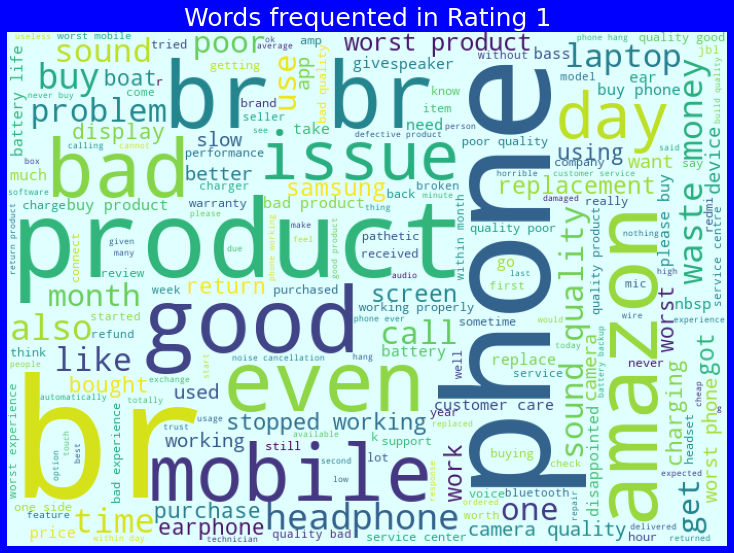

In [49]:
# Getting sense of loud words in Ratings
# Print only rows where the review rated as 1 (ie. Rating=1 star)
rating1 = df['Review'][df['Ratings']==1]

word_cloud = WordCloud(width=700,height=500,background_color='lightcyan',max_words=200,
                       stopwords = stop_words,).generate(' '.join(rating1))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in Rating 1",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

From the above plot we can clearly notice the loud words which are rated as 1. The enlarged words in the plots are the most used texts for ratings 1.



# Words for rating = 2


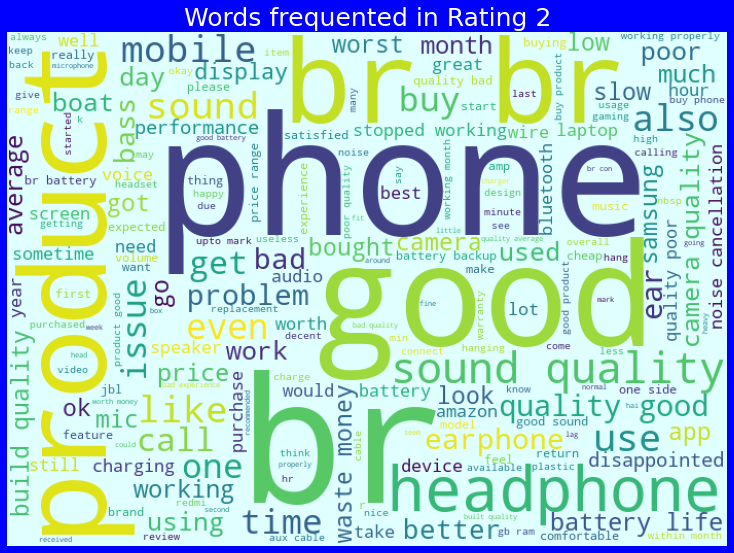

In [50]:
# Getting sense of loud words in Ratings
# Print only rows where the review rated as 2 (ie. Rating=2 star)
rating2 = df['Review'][df['Ratings']==2]

word_cloud = WordCloud(width=700,height=500,background_color='lightcyan',max_words=200,
                       stopwords = stop_words,).generate(' '.join(rating2))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in Rating 2",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

From the plot we can get the sense of words which are used more in the reviews that are rated as 2 stars.



# Words for rating = 3


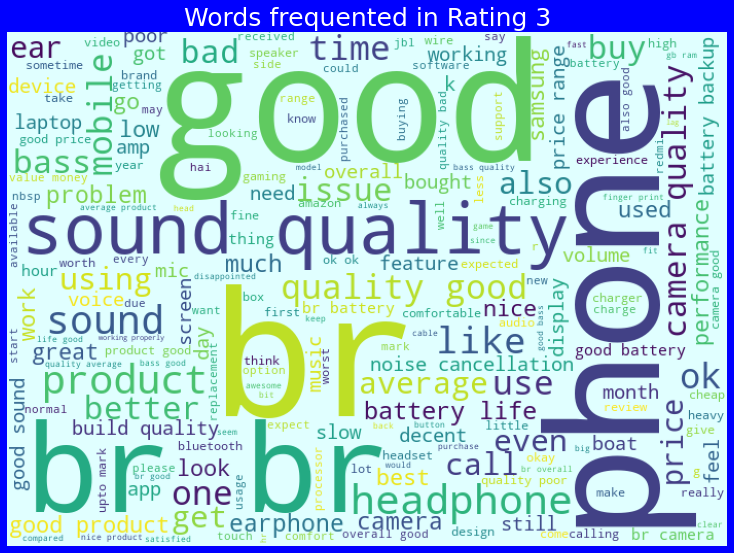

In [51]:
# Getting sense of loud words in Ratings
# Print only rows where the review rated as 3 (ie. Rating=3 star)
rating3 = df['Review'][df['Ratings']==3]

word_cloud = WordCloud(width=700,height=500,background_color='lightcyan',max_words=200,
                       stopwords = stop_words,).generate(' '.join(rating3))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in Rating 3",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

From the above plot we can get the sense of words which are used most likely in reviews which are rated as 3 stars.



# Words for rating = 4


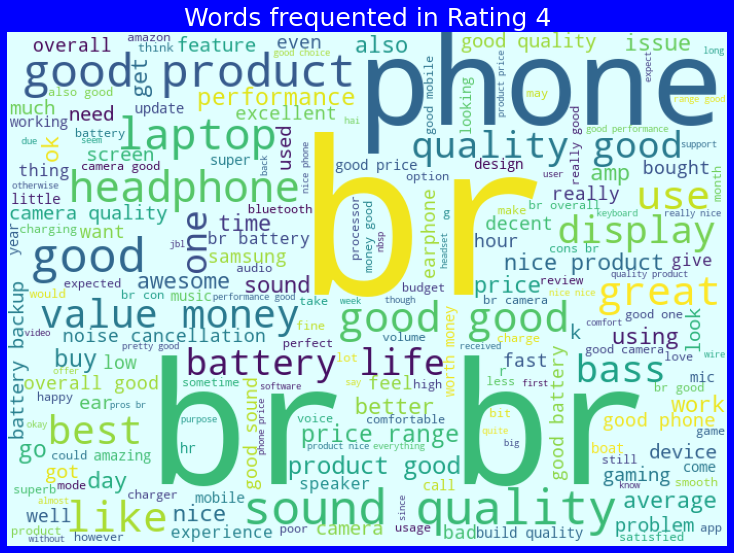

In [52]:
# Getting sense of loud words in Ratings
# Print only rows where the review rated as 4 (ie. Rating=4 star)
rating4 = df['Review'][df['Ratings']==4]

word_cloud = WordCloud(width=700,height=500,background_color='lightcyan',max_words=200,
                       stopwords = stop_words,).generate(' '.join(rating4))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in Rating 4",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

Above are the words which are frequented most in the reviews that are rated as 4 stars.



# Words for rating = 5


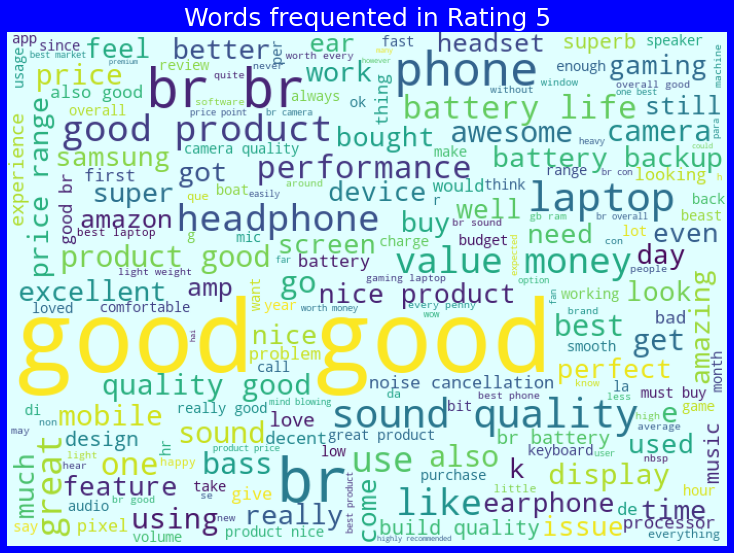

In [53]:
# Getting sense of loud words in Ratings
# Print only rows where the review rated as 5 (ie. Rating=5 star)
rating5 = df['Review'][df['Ratings']==5]

word_cloud = WordCloud(width=700,height=500,background_color='lightcyan',max_words=200,
                       stopwords = stop_words,).generate(' '.join(rating5))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in Rating 5",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

Above plot gives the sense of words that are used more in the reviews which are rated as 5 stars.



# Separating features and label into X and y


In [54]:
# Separating features and labels
x = df['Review']
y = df['Ratings']

# Converting tokens into vectors for moving forward to build machine learning model.


In [55]:
# Using the n_gram tfidf vectorizer(Word vectors)
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                strip_accents = 'unicode',
                                max_features = 100000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [56]:
# Character vectors
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)

In [57]:
# I will combine both word vectors and character vectors as input for our model
X = hstack([train_char_features,train_word_features])

I have performed TfIdf vectorizer to convert words and characters into vectors to use them as an input to our model. I have converted features into number tokens in the dataset. And separated input and output variables.

# Machine Learning Model Building and Evaluation Metrics


Finding Best Random State


In [58]:
# Determining Best Random State
SVC=LinearSVC()
max_score=0
for r_state in range (42,101):
    x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=r_state,test_size=0.30)
    SVC.fit(x_train,y_train)
    pred=SVC.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    if acc_score>max_score:
        max_score=acc_score
        final_r_state=r_state
print("The maximum accuracy score", max_score, "is achieved at", final_r_state)

The maximum accuracy score 0.7008466603951082 is achieved at 73


# Splitting train and test data


In [59]:
# Splitting training and testing data 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=final_r_state)

In [60]:
# Checking the dimension of train and test after splitting
print(x_train.shape,'\t',x_test.shape)        # Shape of x data
print(y_train.shape,'\t',y_test.shape)        # Shape of y data

(19840, 150000) 	 (8504, 150000)
(19840,) 	 (8504,)


Checked the dimension of both train and test data after splitting them.



# Balancing data using oversampling technique


From the visualization we have seen there is class imbalance issue, let's balance the data using oversampling method.



In [61]:
# Let's check the number of classes before fit
from collections import Counter
print("Count of classes before fit {}".format(Counter(y_train)))

Count of classes before fit Counter({5: 7742, 4: 3359, 1: 3238, 3: 2880, 2: 2621})


Here we have the maximum count 7742 for rating 5, I am using this count to get the balanced data ensuring all the entries to be having the same count of 7742.



In [85]:
# Oversample and plot imbalanced dataset with SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Transform the dataset
os=SMOTE(sampling_strategy = {1: 7742, 2: 7742, 3: 7742, 4: 7742, 5: 7742})
x_train_os,y_train_os=os.fit_resample(x_train,y_train)

print("Count of classes before fit{}".format(Counter(y_train)))
print("Count of classes after fit {}".format(Counter(y_train_os)))

Count of classes before fitCounter({5: 7742, 4: 3359, 1: 3238, 3: 2880, 2: 2621})
Count of classes after fit Counter({2: 7742, 1: 7742, 5: 7742, 4: 7742, 3: 7742})


"SMOTE" is the oversampling mechanism that we are using to ensure that all the categories present in our target label have the same value. I have set the count of all the categories to be 7742 which is the highest count in the target column. After applying oversampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

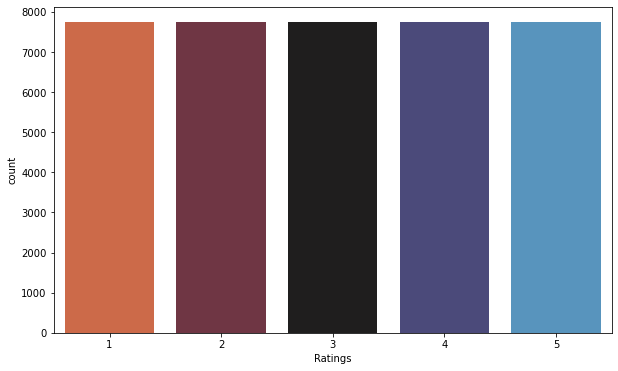

In [86]:
# Visualizing the data after oversampling
plt.figure(figsize=(10,6))
sns.countplot(y_train_os,palette="icefire_r")
plt.show()

As we can observe all the categories in the target variable "Ratings" have equal values. The class imbalancing issue has been solved. Now we can build our machine learning models.

In [90]:
# Creating instances for different Classifiers

SVC = LinearSVC()
SGD = SGDClassifier()
XGB = XGBClassifier(verbosity=0)
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
XT = ExtraTreesClassifier()

# Creating a list model where all the models will be appended for further evaluation in loop.
models=[]
models.append(('LinearSVC',SVC))
models.append(('SGDClassifier',SGD))

models.append(('DecisionTreeClassifier',DTC))
models.append(('RandomForestClassifier',RFC))
models.append(('XT = ExtraTreesClassifier',XT))

I have created 6 different classification algorithms and are appended in the variable models. Now, let's run a for loop which contains the accuracy of the models along with different evaluation metrics.

In [91]:
# Creating empty lists
Model = []
Acc_score = []
cvs = []

for name,model in models:
    print("******************************",name,"******************************")
    print("\n")
    Model.append(name)
    model.fit(x_train_os,y_train_os)
    print(model)
    y_pred=model.predict(x_test)
# Accuracy Score
    acc_score=accuracy_score(y_test,y_pred)*100
    print('Accuracy_Score: ',acc_score)
    Acc_score.append(acc_score)
# Cross Validation Score
    cv=cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()*100
    print('Cross Validation Score: ',cv)
    cvs.append(cv)
# Confusion Matrix
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print("\n")
# Classification Report
    print('Classification Report:\n ')
    print(classification_report(y_test,y_pred))

****************************** LinearSVC ******************************


LinearSVC()
Accuracy_Score:  69.4967074317968
Cross Validation Score:  65.93599468092324
Confusion matrix: 

[[ 991  161   99   56   41]
 [ 230  693  188   83   43]
 [ 126  162  643  177  115]
 [  46   64  143  845  334]
 [  29   45  100  352 2738]]


Classification Report:
 
              precision    recall  f1-score   support

           1       0.70      0.74      0.72      1348
           2       0.62      0.56      0.59      1237
           3       0.55      0.53      0.54      1223
           4       0.56      0.59      0.57      1432
           5       0.84      0.84      0.84      3264

    accuracy                           0.69      8504
   macro avg       0.65      0.65      0.65      8504
weighted avg       0.69      0.69      0.69      8504

****************************** SGDClassifier ******************************


SGDClassifier()
Accuracy_Score:  67.70931326434619
Cross Validation Score:  65.960

In [93]:
models.append(('XGBClassifier',XGB))

# Model Selection


In [92]:
# Displaying Scores and metrics:
Results=pd.DataFrame({'Model': Model,'Accuracy Score': Acc_score,
                      'Cross Validation Score':cvs}) 
Results

,Model,Accuracy Score,Cross Validation Score
0,LinearSVC,69.496707,65.935995
1,SGDClassifier,67.709313,65.960758
2,DecisionTreeClassifier,62.793979,60.146222
3,RandomForestClassifier,68.438382,66.581601
4,XT = ExtraTreesClassifier,68.732361,66.521622


After creating and training different classification algorithms, we can see that the difference between accuracy and cross validation score is less for "Stochastic Gradient Descent Classifier (SGDClassifier)". On this basis I can conclude that "SGDClassifier" as the best fitting model. Now, we will try Hyperparameter Tuning to find out the best parameters and using them to improve the scores and metrics values.

# Hyper Parameter Tuning


In [75]:
# Let's Use the GridSearchCV to find the best paarameters in SGDClassifier

# SGDClassifier
parameters = {'loss':['hinge','squared_hinge'],
              'penalty':['l2'],
              'n_jobs':[-1,None],
              'alpha':[0.0001,0.0005]}

# Running GridSearchCV for the model Bagging Regressor.
GCV=GridSearchCV(SGDClassifier(),parameters,cv=5)

In [76]:
# Training the best model
GCV.fit(x_train_os,y_train_os)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.0005],
                         'loss': ['hinge', 'squared_hinge'],
                         'n_jobs': [-1, None], 'penalty': ['l2']})

I Have used 4 SGDClassifier parameters to be saved under the variable "parameters" that will be used in GridSearchCV for finding the best output. Assigned a variable to the GridSearchCV function after entering all the necessary inputs. And we used our training data set to make the GridSearchCV aware of all the hyper parameters that needs to be applied on our best model.

In [77]:
#Getting best parameters
GCV.best_params_

{'alpha': 0.0001, 'loss': 'hinge', 'n_jobs': None, 'penalty': 'l2'}

These are the best parameters of SGD Classifier.



# Creating final model


In [78]:
# Creating final model 
ratings_model = SGDClassifier(alpha=0.0001, loss='hinge', n_jobs=None, penalty='l2')
ratings_model.fit(x_train_os, y_train_os)
pred = ratings_model.predict(x_test)
acc_score = accuracy_score(y_test,pred)
print("Accuracy score:", acc_score*100)
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print('\n')
print('Classification Report:','\n',classification_report(y_test,pred))

Accuracy score: 66.16886171213547
Confusion Matrix: 
 [[1025  187   68   48   20]
 [ 300  682  164   60   31]
 [ 149  249  594  157   74]
 [  63  107  195  754  313]
 [  50   85  133  424 2572]]


Classification Report: 
               precision    recall  f1-score   support

           1       0.65      0.76      0.70      1348
           2       0.52      0.55      0.54      1237
           3       0.51      0.49      0.50      1223
           4       0.52      0.53      0.52      1432
           5       0.85      0.79      0.82      3264

    accuracy                           0.66      8504
   macro avg       0.61      0.62      0.62      8504
weighted avg       0.67      0.66      0.66      8504



I have successfully incorporated the hyper parameter tuning using best parameters of SGDClassifier and the accuracy of the model has been increased after hyperparameter tuning and received the accuracy score as 69.40% which is very good.

# Confusion Matrix


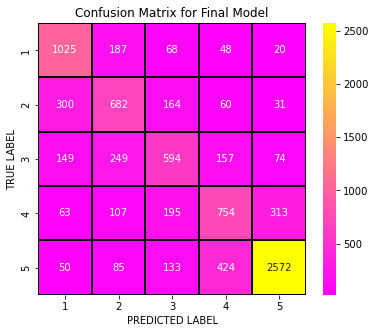

In [79]:
# Plot confusion matrix heatmap
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["1","2","3","4","5"]
y_axis_labels = ["1","2","3","4","5"]

f , ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="spring",
            xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Final Model')
plt.show()

# Saving The Model


In [80]:
# Saving the model using .pkl
import joblib
joblib.dump(ratings_model,"Reviews_Ratings_Prediction.pkl")

['Reviews_Ratings_Prediction.pkl']

I am using the joblib option to save the final classification model in the form of .pkl.



Loading and Predicting the Saved Model


In [81]:
# loading the final model
model = joblib.load('Reviews_Ratings_Prediction.pkl')

# Creating dataframe for predicted results
prediction=pd.DataFrame([model.predict(X)[:]],index=["Predicted"])
prediction.T

,Predicted
0,1
1,3
2,1
3,1
4,1
...,...
28339,5
28340,5
28341,5
28342,5


I have loaded the saved model to get the predictions for reviews ratings. Using classification model, we have got the predicted values for review ratings.



# Saving the Predictions


In [82]:
# Saving the predicted values
prediction.to_csv('Ratings_Predicted_Values.csv')

Finally, saving the predicted values of the review ratings.